<a href="https://colab.research.google.com/github/jfonsecav/physics-tools/blob/main/LinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

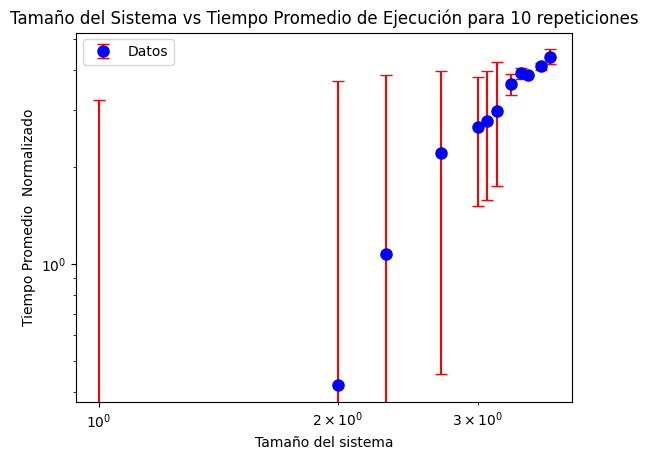

Tiempo promedio Normalizado
10	1.0
100	2.6233698487219614
200	11.863849765258214
500	163.08537645626845
1000	449.3521126760563
1200	591.2535211267606
1500	968.9789601808382
2000	4054.5632063988865
2500	8020.892018779342
3000	7447.937923839331
4000	12822.927316988349
5000	25034.267779516606


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


#Tamaños

tam=np.array([10,100,200,500,1000,1200,1500, 2000, 2500,3000,4000,5000])

promedios=[]

desviacion=[]

#Número de repeteciones por cada tamaño (Lo puedes cambiar si deseas)

r=10

for ii in tam:

    n=ii

    tiempos=[]

    for jj in range(0,r):

        #Creación de La matriz aleatoria nxn llenada con numeros enteros y vector aleatorio nx1 llenada con numeros enteros

        matriz_aleatoria = np.random.randint(1, 10 + 1, size=(n, n))
        vector_aleatorio = np.random.randint(1,10+ 1, size=(n, 1))

        #Ejecución de np.linalg.solve para el sistema y medición del tiempo que tarda unsando la libreria time

        inicio = time.time()

        x = np.linalg.solve(matriz_aleatoria, vector_aleatorio)

        fin = time.time()
        tiempo_transcurrido = fin - inicio

        tiempos.append(tiempo_transcurrido)


    promedios.append(np.mean(tiempos))
    desviacion.append(np.std(tiempos))

#Una vez llenadas las listas de promedios y desvicación se vuelven arreglos de numpy para poder operarse con mayor sencillez

prom=np.array(promedios)
desv=np.array(desviacion)

#Normalización de los promedios y ancho de barras de error

promnorm=prom*(1/prom[0])

errores=desv*3

#Creación de la Figura

x_log = np.log10(tam)
y_log = np.log10(promnorm)
errores_log = np.abs(np.log10(errores))


plt.errorbar(x_log, y_log, yerr=errores_log, fmt='o', capsize=4, markersize=8, color='blue', ecolor='red', label='Datos')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño del sistema')
plt.ylabel('Tiempo Promedio  Normalizado')
plt.title(f'Tamaño del Sistema vs Tiempo Promedio de Ejecución para {r} repeticiones')
plt.legend()
plt.savefig('FiguraJSVR.pdf', format='pdf')
plt.show()

#Tiempos Normalizado

print('Tiempo promedio Normalizado')

for tam, promnorm in zip(tam,promnorm):
    print(f'{tam}\t{promnorm}')


In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Linear Systems : Matrices, Vectors, eigen systems
In this module we will learn how to solve linear systems which are very common in engineering.
Applications are numerous:
- Civil, chemical, electrical, mechanical, ..., engineering
- In biology by using linear algebra to analyze huge data sets regarding protein folding. https://math.stackexchange.com/questions/571109/any-application-of-vector-spaces-in-biology-or-biotechnology
- In genetics to model the evolution of genes.
- Markov chains on industrial processes with applications of matrices and eigen systems.
- Population dynamics.
- Perception of colors.
- Adjacency graphs: https://en.wikipedia.org/wiki/Adjacency_matrix , https://towardsdatascience.com/matrices-are-graphs-c9034f79cfd8


Tips about matrix computing:
- https://nhigham.com/2022/10/11/seven-sins-of-numerical-linear-algebra/
- http://gregorygundersen.com/blog/2020/12/09/matrix-inversion/

<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/Linear-Systems-Applications.png?raw=1" width=900>

<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/Matrices-rotations-eigenvalues.png?raw=1" width=900>


Ejemplos de rotaciones:
- https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/Bounce-VPython
- https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/Plot3D

<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/bungee-family-equ.png?raw=1" width=800>

> Write this as a linear system $A\vec x = \vec b$, with unknows $x_1, x_2, x_3$



A = (k1+k2  -k2      0
     -k2    k2+k3   -k3
     0      -k3      k3)
     
    [[k1 + k2, -k2  , 0  ],
     [-k2    , k2+k3, -k3],
     [0      , -k3  , k3]]

x = (x1
     x2
     x3)
     
b = (m1g
     m2g
     m3g)

# How to index a Matrix? NOTE: Python indexes start at 0
For a discussion about starting at zero see: https://news.ycombinator.com/item?id=32581721
<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/matrix-base.png?raw=1" width=900>

# Defining matrices in python

## Scipy
See https://docs.scipy.org/doc/numpy-1.17.0/reference/generated/numpy.array.html#numpy.array



In [ ]:
import numpy as np
A = np.array([[1, 2],  # primera fila, indice es 0
              [3, 4]]) # Segunda fila, indice es 1
print(A[0][1])
print(f"Matrix : \n", A)
#
A = np.array([1, 2, 3, 4]).reshape(2,2)
print("Matrix : \n", A)
print("A[1,0] : \n", A[1,0])
print("A[1][0] : \n", A[1][0])

print("A[:,-1] : \n", A[:,-1])

2
Matrix : 
 [[1 2]
 [3 4]]
Matrix : 
 [[1 2]
 [3 4]]
A[1,0] : 
 3
A[1][0] : 
 3
A[:,-1] : 
 [2 4]


# Matrix operations
Add, substract, multiply, etc


In [ ]:
import numpy as np
a = np.array([[1, 2],[3, 4]])
b = np.array([[5, -1], [-3, 24]])
c = a+b # sum
print(c)
c = a*b # Multiplication
print(c)
c = a/b # divide element by element
print(c)
print(c.max())
print(c.min())
print(b/b)

[[ 6  1]
 [ 0 28]]
[[ 5 -2]
 [-9 96]]
[[ 0.2        -2.        ]
 [-1.          0.16666667]]
0.2
-2.0
[[1. 1.]
 [1. 1.]]


# Solving linear systems $A\vec x= \vec b$
Solve the following system:
<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/linear-example-01.png?raw=1" width=600>

In [ ]:
import numpy as np

A = np.array([[150, -100, 0],
              [-100, 150, -50],
              [0, -50, 50]])
b = np.array([588.6, 686.7, 784.8])
x = np.linalg.solve(A, b) # magic
print("Solution: \n", x)
# confirm
print("Delta:\n", A.dot(x) - b)

Solution: 
 [41.202 55.917 71.613]
Delta:
 [-1.13686838e-13  1.25055521e-12  1.13686838e-13]


In [ ]:
import numpy as np

#np.random.seed(10) # Play with this value

N = 1000

A = np.random.rand(N,N)
b = np.random.rand(N)
x = np.linalg.solve(A, b) # magic
print("Solution: \n", x[:10])
# confirm
#print("Delta:\n", A.dot(x) - b)

## Exercise: Rewrite and solve the following system

<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/linear-example-03.png?raw=1" width=600>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert np.all(np.isclose(x, np.array([-17.01923077,  -9.61538462,  -1.53846154])))

## Exercise: Rewrite and solve the following system
Extra: Can yu measure the time spent in the computation? (google for timer or timeit in python)

<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/linear-example-02.png?raw=1" width=600>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert np.all(np.isclose(x, np.array([ 6.15384615, -4.61538462, -1.53846154, -6.15384615, -1.53846154, -1.53846154])))

## Exercise: Solve and plot the following system

$$ \frac{-2.3x_1}{5} + x_2 = 1.1 $$
$$-0.5x_1 + x_2 = 1 $$
Plot the system of equations and check whether this solution is or
not special. Compute the quantity `np.linalg.cond`


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Exercise: Simulating temperature
- Temperature discretized <img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/linear-example-04-T.png?raw=1" width=800>
- System of equations <img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/linear-example-04-T-B.png?raw=1" width=800>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Exercise
How does the computing time grows with the matrix size?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Computing inverse matrices
See : https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv

You can watch: https://www.youtube.com/watch?v=uQhTuRlWMxw



In [ ]:
%time
from scipy import linalg
import numpy as np
A = np.array([[1., 2.],
              [3., 4.]])
B = linalg.inv(A) # magic
#print("B : \n", B)
# verify
#print("A A^-1 : \n", A.dot(B))

In [ ]:
%%time
from scipy import linalg
import numpy as np
N = 1000
A = np.random.rand(N, N)
B = linalg.inv(A) # magic
#print("B : \n", B)
# verify
#print("A A^-1 : \n", A.dot(B))

## The condition number
The number
$$\kappa = ||A|| ||A^{-1}||$$
is called the condition number of a matrix. Ideally it is $1$. If $\kappa$ is much
larger than one, the matrix is ill-conditioned and the solution
might have a lot of error.
> Compute the condition number of the following matrix:
   \begin{equation}
   A =
   \begin{bmatrix}
   1.001 & 0.001\\
   0.000 & 0.999
   \end{bmatrix}
   \end{equation}
Plot the associate system to check for the result


In [ ]:
from scipy import linalg
import numpy as np
A = np.array([[1.001, 0.001],
                [0.000, 0.999]])
kappa = linalg.norm(A)*linalg.norm(linalg.inv(A))
print(f"{kappa = }")


## Exercise
How does the computing time grows with the matrix size?

In [ ]:
from scipy import linalg
import numpy as np
import time # use time.process_time_ns() , compare with monotonic_ns()

MINSIZE=1
MAXSIZE=5000
NSAMPLES=10
data = np.zeros((NSAMPLES, 3))
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# For profiling, check https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5
#!pip install py-heat-magic

In [ ]:
%load_ext heat

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


Improve this by taking at least 10 time samples per matrix size and computing the statistics

# Eigen values and eigen vectors
The eigen-values ${\lambda_i}$ and eigen-vectors ${x}$ of a matrix satisfy the equation

$$ A\vec x = \lambda \vec x $$

The eigen-vectors form a basis where the matrix can be
diagonalized. In general, computing the eigen vectors and
aeigenvalues is hard, and they can also be complex.

For a more visual introduction watch:  https://www.youtube.com/watch?v=PFDu9oVAE-g

<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/vector-field.png?raw=1" width=700>
REF: https://www.reddit.com/r/math/comments/b7ou6t/3blue1brown_overview_of_differential_equations/

In [ ]:
# See : https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig
import numpy as np
from scipy import linalg
#A = np.array([[0., -1.], [1., 0.]])
#A = np.array([[1, 0.], [0., 2.]])
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
sol = linalg.eig(A) # magic
print("Eigen-values: ", sol[0])
print("Eigen-vectors:\n", sol[1])
# verify
print("Verification: ", A.dot(sol[1][:, 0]) - sol[0][0]*sol[1][:, 0])


## Exercise
Find the eigen-values and eigen-vectors for the following system
<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/eigen-exer-02.png?raw=1" width=700>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


## Exercise
How does the computing time grows with the matrix size?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Problems

## Linear System
<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-03.png?raw=1" width=700>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Rotation matrix
Let $\vec x = (a, b)$ be a two-dimensional vector. Write a matrix that rotates the vector by 90 degrees. Use matrix multiplication to check your results.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Thick lens (Boas, 3.15.9)
The next matrix is used when discussing a thick lens in air
\begin{equation}
A =
\begin{pmatrix}
1 & (n-1)/R_2\\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
d/n & 1
\end{pmatrix}
\begin{pmatrix}
1 & -(n-1)/R_1\\
0 & 1
\end{pmatrix},
\end{equation}
where $d$ is the thickness of the lens, $n$ is the refraction index, and $R_1$ and $R_2$ are the curvature radius. Element $A_{12}$ is equal to $-1/f$, where $f$ is the focal distance. Evaluate $\det A$ and $1/f$ as functions of $n \in [1, 3]$.  




In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## System of reactors

|System | Model |
|-|-|
|<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-04-B.png?raw=1" width=700>|<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-04.png?raw=1" width=700>|

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


## Products production
<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-05.png?raw=1" width=700>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Teaching distribution
<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-06.png?raw=1" width=700>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## GPA
| Statement | Table|
|-|-|
|<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-07-A.png?raw=1" width=500> | <img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-07-B.png?raw=1" width=500>|

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Payments
<img src="https://github.com/iluvatar1/2023-II-HerrComp/blob/master/04-LinearAlgebra/fig/problem-08.png?raw=1" width=700>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()